# Introduction to Pandas/NumPy- Part-1

Following the content in A comprehensive Learning path to become a data scientist in 2019 by Analytics Vidhya.
### Dataset available at http://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii

### I'm also moving away from what AV has show using Matplotlib.. I'm attempting to use Seaborn as much as possible.


In [27]:
import seaborn as sns

In [54]:
import pandas as pd
# import matplotlib as plt
# import numpy
%pylab inline
# %matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.txt")

## Describing the data and Analysis.
1) Count - Max Count = 614 . Min Count = 592 . Suggessting Missing Values

In [65]:
print(df.median(),"\n")
print(df.mean())

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64 

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64


### The Median and Mean Suggest a skew in the data

In [56]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


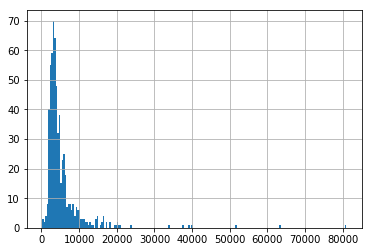

In [25]:
df['ApplicantIncome'].hist(bins=200)


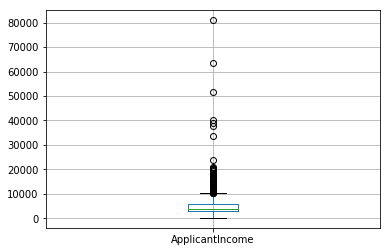

In [26]:
df.boxplot(column='ApplicantIncome')


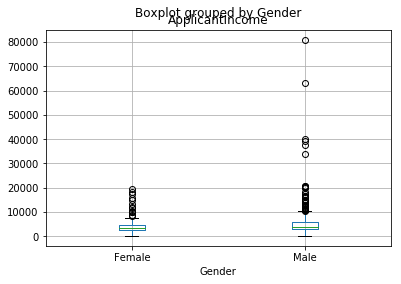

In [87]:
df.boxplot(column='ApplicantIncome', by = 'Gender')


In [14]:
df.pivot_table(values='Loan_Status',index=['Credit_History'], aggfunc=lambda x:x.map({"Y":1,"N":0}).mean())

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [56]:
df['Credit_History'].value_counts(ascending=True) 


0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [45]:
temp1 = df['Credit_History'].value_counts(ascending=True) 
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()) 
print ('Frequency Table for Credit History:' )
print (temp1) 
print ('\nProbility of getting loan for each Credit History class:' )
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


### Using SNS for BARPLOT

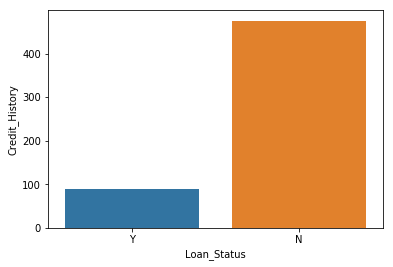

In [58]:
sns.barplot(x=df["Loan_Status"],y=df['Credit_History'].value_counts() )

Text(0.5, 1.0, 'Probability of getting loan by credit history')

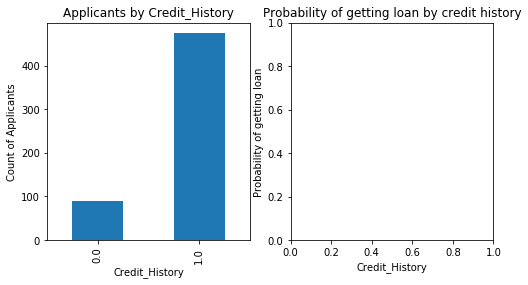

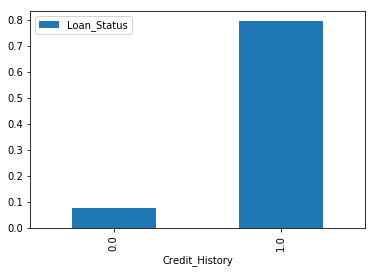

In [46]:
fig = plt.figure(figsize=(8,4)) 
ax1 = fig.add_subplot(121) 
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History") 
temp1.plot(kind='bar') 
ax2 = fig.add_subplot(122) 
temp2.plot(kind = 'bar') 
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history")

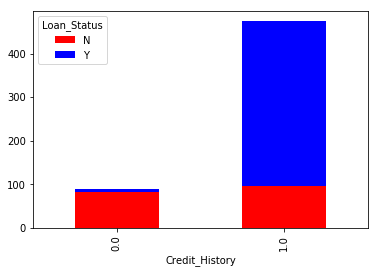

In [95]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


In [73]:
ct = pd.crosstab(df['Credit_History'], df['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


## Using SNS for crosstab visualization. 
#### Seaborn doesn't have an out of the box crosstab fucntion. However, with the help of friends in stackoverflow.
https://stackoverflow.com/questions/43544694/using-pandas-crosstab-with-seaborn-stacked-barplots


In [84]:
stacked = ct.stack().reset_index().rename(columns={0:'Count_of_loan_sanctioned'})

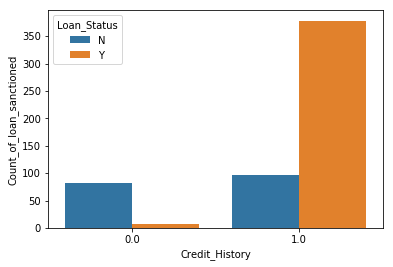

In [85]:
sns.barplot(x=stacked.Credit_History, y=stacked.Count_of_loan_sanctioned, hue=stacked.Loan_Status)